# Analysis of Past Runs

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wandb
from tqdm import tqdm
from string import Template

### Get all runs from given sweep

In [54]:
api = wandb.Api(timeout=60)

In [133]:
def get_sweep_df(api: wandb.Api, 
                 sweep_id: str) -> pd.DataFrame:
    """Returns a dataframe with runs from a sweep and its parameters."""
    API_STRING = Template("dl-mini/DL_PROJECT_CNN/$sweep_id").substitute(sweep_id=sweep_id)
    sweep = api.sweep(API_STRING)
    summary_list, config_list, name_list = [], [], []
    for run in tqdm(sweep.runs):
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(float(run.summary._json_dict['valid/loss']))

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_') and k != 'model'})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

    runs_df = pd.DataFrame({
        "valid/loss": summary_list,
        "config": config_list,
        "name": name_list
    })
    
    # Extracting values from the JSON column using json_normalize
    normalized_runs_df = pd.json_normalize(runs_df['config'])
    runs_df = pd.concat([runs_df.drop(columns='config'), normalized_runs_df], axis=1)

    return runs_df


### Analysis of  Sweep `resnet_cnn` (`1udoheoq`)

In [134]:
resnet_sweep_df = get_sweep_df(api, '1udoheoq')

100%|██████████| 150/150 [00:00<00:00, 74969.69it/s]


In [135]:
resnet_sweep_df.columns

Index(['valid/loss', 'name', 'beta1', 'beta2', 'epochs', 'dropout',
       'optimizer', 'activation', 'batch_norm', 'batch_size', 'cutmix_add',
       'input_size', 'l2_penalty', 'model_name', 'num_classes',
       'learning_rate', 'random_crop_add', 'random_flip_add',
       'random_flip_prob', 'random_crop_ratio', 'random_crop_scale',
       'random_rotation_add', 'random_color_jitter_add',
       'random_color_jitter_hue', 'random_rotation_degrees',
       'random_gaussian_blur_add', 'random_gaussian_blur_sigma',
       'random_color_jitter_contrast', 'random_color_jitter_brightness',
       'random_color_jitter_saturation', 'random_gaussian_blur_kernel_size'],
      dtype='object')

In [136]:
cols_to_drop = [
    'model_name', "input_size", "num_classes", "batch_size", "epochs"
]

bool_cols = [
    'random_crop_add', 'random_flip_add', 'batch_norm',
    'random_gaussian_blur_add', 'random_rotation_add', 'random_color_jitter_add'
]

In [137]:
# remove the cols that are not of interest
resnet_sweep_df = resnet_sweep_df.drop(columns=cols_to_drop)

In [138]:
resnet_sweep_df = resnet_sweep_df.set_index('name')

In [139]:
resnet_sweep_df

,valid/loss,beta1,beta2,dropout,optimizer,activation,batch_norm,cutmix_add,l2_penalty,learning_rate,...,random_rotation_add,random_color_jitter_add,random_color_jitter_hue,random_rotation_degrees,random_gaussian_blur_add,random_gaussian_blur_sigma,random_color_jitter_contrast,random_color_jitter_brightness,random_color_jitter_saturation,random_gaussian_blur_kernel_size
name,,,,,,,,,,,,,,,,,,,,,
astral-sweep-150,2.125071,0.872636,0.904756,0.5,Adam,ReLU,False,cut,0.00,0.000239,...,False,True,0.186326,30,False,0.347140,0.795713,0.897641,0.791876,5
honest-sweep-149,2.125285,0.961749,0.918860,0.4,Adam,ReLU,False,none,0.10,0.000170,...,True,False,0.158080,66,False,0.307670,0.341724,0.035726,0.207630,3
brisk-sweep-148,2.195316,0.908250,0.965723,0.5,SGD,ReLU,True,cut,0.01,0.017147,...,True,True,0.496617,27,True,0.472401,0.882328,0.845214,0.263704,5
azure-sweep-147,2.304008,0.738897,0.910764,0.2,Adam,ReLU,False,mix,0.25,0.088695,...,False,True,0.299123,0,True,0.636937,0.382503,0.492608,0.301871,7
absurd-sweep-146,2.133941,0.742299,0.912191,0.3,Adam,ReLU,False,cut,0.15,0.000148,...,False,True,0.196750,151,False,0.945447,0.227915,0.342844,0.043829,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal-sweep-5,2.223597,0.861028,0.964393,0.5,Adam,ReLU,True,mix,0.25,0.005345,...,False,False,0.097285,25,True,0.915257,0.678218,0.471214,0.635581,5
silver-sweep-4,2.302587,0.760327,0.958317,0.2,SGD,ReLU,True,mix,0.30,0.018268,...,True,False,0.400285,29,True,0.623911,0.549777,0.087323,0.172431,3
resilient-sweep-3,2.315239,0.738161,0.941678,0.5,Adam,ReLU,False,mix,0.30,0.052897,...,True,False,0.046431,15,True,0.400185,0.466639,0.179577,0.192362,7


In [140]:
resnet_sweep_df['batch_norm'] = resnet_sweep_df['batch_norm'].astype(bool)
resnet_sweep_df['random_crop_add'] = resnet_sweep_df['random_crop_add'].astype(bool)
resnet_sweep_df['random_flip_add'] = resnet_sweep_df['random_flip_add'].astype(bool)
resnet_sweep_df['random_gaussian_blur_add'] = resnet_sweep_df['random_gaussian_blur_add'].astype(bool)
resnet_sweep_df['random_rotation_add'] = resnet_sweep_df['random_rotation_add'].astype(bool)
resnet_sweep_df['random_color_jitter_add'] = resnet_sweep_df['random_color_jitter_add'].astype(bool)

In [141]:
X_columns = [
    "batch_norm",
    "beta1",
    "beta2",
    "cutmix_add",
    "dropout",
    "l2_penalty",
    "learning_rate",
    "optimizer",
    "random_color_jitter_add",
    "random_color_jitter_brightness",
    "random_color_jitter_contrast",
    "random_color_jitter_hue",
    "random_color_jitter_saturation",
    "random_crop_add",
    "random_crop_ratio",
    "random_crop_scale",
    "random_flip_add",
    "random_flip_prob",
    "random_gaussian_blur_add",
    "random_gaussian_blur_kernel_size",
    "random_gaussian_blur_sigma",
    "random_rotation_add",
    "random_rotation_degrees",
]

learning_threshold = 2.15 # based on the graphs in wandb dashboard
X = resnet_sweep_df[X_columns]
y = resnet_sweep_df['valid/loss'] < learning_threshold # indicator whether the model has learned (1) or not (0)

In [143]:
# Turn off transformation parameters if inactive
X['random_color_jitter_brightness'] = X['random_color_jitter_add'] * X['random_color_jitter_brightness']
X['random_color_jitter_contrast'] =   X['random_color_jitter_add'] * X['random_color_jitter_contrast']
X['random_color_jitter_hue'] =        X['random_color_jitter_add'] * X['random_color_jitter_hue']
X['random_color_jitter_saturation'] = X['random_color_jitter_add'] * X['random_color_jitter_saturation']

X['random_crop_ratio'] = X['random_crop_add'] * X['random_crop_ratio']
X['random_crop_scale'] = X['random_crop_add'] * X['random_crop_scale']

X['random_flip_prob'] = X['random_flip_add'] * X['random_flip_prob']

X['random_gaussian_blue_kernel_size'] = X['random_gaussian_blur_add'] * X['random_gaussian_blur_kernel_size']
X['random_gaussian_blue_sigma'] = X['random_gaussian_blur_add'] * X['random_gaussian_blur_sigma']

X['random_rotation_degrees'] = X['random_rotation_add'] * X['random_rotation_degrees']

X = X.drop(columns=['random_color_jitter_add', 
                    'random_crop_add', 
                    'random_flip_add', 
                    'random_gaussian_blur_add', 
                    'random_rotation_add'])

C:\Users\barto\AppData\Local\Temp\ipykernel_24112\2443369626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['random_color_jitter_brightness'] = X['random_color_jitter_add'] * X['random_color_jitter_brightness']
C:\Users\barto\AppData\Local\Temp\ipykernel_24112\2443369626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['random_color_jitter_contrast'] =   X['random_color_jitter_add'] * X['random_color_jitter_contrast']
C:\Users\barto\AppData\Local\Temp\ipykernel_24112\2443369626.py:4: SettingWith

In [145]:
cat_vars = [
    'optimizer',
    'batch_norm',
    'cutmix_add'
]

# One-hot encode the data using pandas get_dummies
X_enc = pd.get_dummies(X, columns=cat_vars, drop_first=True)

In [146]:
X_enc

,beta1,beta2,dropout,l2_penalty,learning_rate,random_color_jitter_brightness,random_color_jitter_contrast,random_color_jitter_hue,random_color_jitter_saturation,random_crop_ratio,...,random_flip_prob,random_gaussian_blur_kernel_size,random_gaussian_blur_sigma,random_rotation_degrees,random_gaussian_blue_kernel_size,random_gaussian_blue_sigma,optimizer_SGD,batch_norm_True,cutmix_add_mix,cutmix_add_none
name,,,,,,,,,,,,,,,,,,,,,
astral-sweep-150,0.872636,0.904756,0.5,0.00,0.000239,0.897641,0.795713,0.186326,0.791876,0.325737,...,0.000000,5,0.347140,0,0,0.000000,False,False,False,False
honest-sweep-149,0.961749,0.918860,0.4,0.10,0.000170,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.431848,3,0.307670,66,0,0.000000,False,False,False,True
brisk-sweep-148,0.908250,0.965723,0.5,0.01,0.017147,0.845214,0.882328,0.496617,0.263704,0.550683,...,0.000000,5,0.472401,27,5,0.472401,True,True,False,False
azure-sweep-147,0.738897,0.910764,0.2,0.25,0.088695,0.492608,0.382503,0.299123,0.301871,0.638784,...,0.871046,7,0.636937,0,7,0.636937,False,False,True,False
absurd-sweep-146,0.742299,0.912191,0.3,0.15,0.000148,0.342844,0.227915,0.196750,0.043829,0.592557,...,0.179791,3,0.945447,0,0,0.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal-sweep-5,0.861028,0.964393,0.5,0.25,0.005345,0.000000,0.000000,0.000000,0.000000,0.560987,...,0.580364,5,0.915257,0,5,0.915257,False,True,True,False
silver-sweep-4,0.760327,0.958317,0.2,0.30,0.018268,0.000000,0.000000,0.000000,0.000000,0.563455,...,0.924007,3,0.623911,29,3,0.623911,True,True,True,False
resilient-sweep-3,0.738161,0.941678,0.5,0.30,0.052897,0.000000,0.000000,0.000000,0.000000,0.663209,...,0.057167,7,0.400185,15,7,0.400185,False,False,True,False


In [147]:
y.value_counts()

valid/loss
False    96
True     54
Name: count, dtype: int64

Take all this data and try to plot a decision tree that best describes how to get a better learning model (class 1)

[Text(0.640625, 0.95, 'random_color_jitter_saturation <= 0.063\ngini = 0.461\nsamples = 150\nvalue = [96, 54]\nclass = Not Learning'),
 Text(0.4375, 0.85, 'l2_penalty <= 0.125\ngini = 0.5\nsamples = 88\nvalue = [45, 43]\nclass = Not Learning'),
 Text(0.28125, 0.75, 'beta1 <= 0.903\ngini = 0.456\nsamples = 54\nvalue = [19, 35]\nclass = Learning'),
 Text(0.1875, 0.65, 'random_gaussian_blur_sigma <= 0.747\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = Not Learning'),
 Text(0.15625, 0.55, 'random_rotation_degrees <= 76.5\ngini = 0.469\nsamples = 24\nvalue = [9, 15]\nclass = Learning'),
 Text(0.09375, 0.45, 'beta1 <= 0.879\ngini = 0.305\nsamples = 16\nvalue = [3, 13]\nclass = Learning'),
 Text(0.0625, 0.35, 'cutmix_add_none <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = Learning'),
 Text(0.03125, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Learning'),
 Text(0.09375, 0.25, 'beta2 <= 0.927\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Learning'),
 T

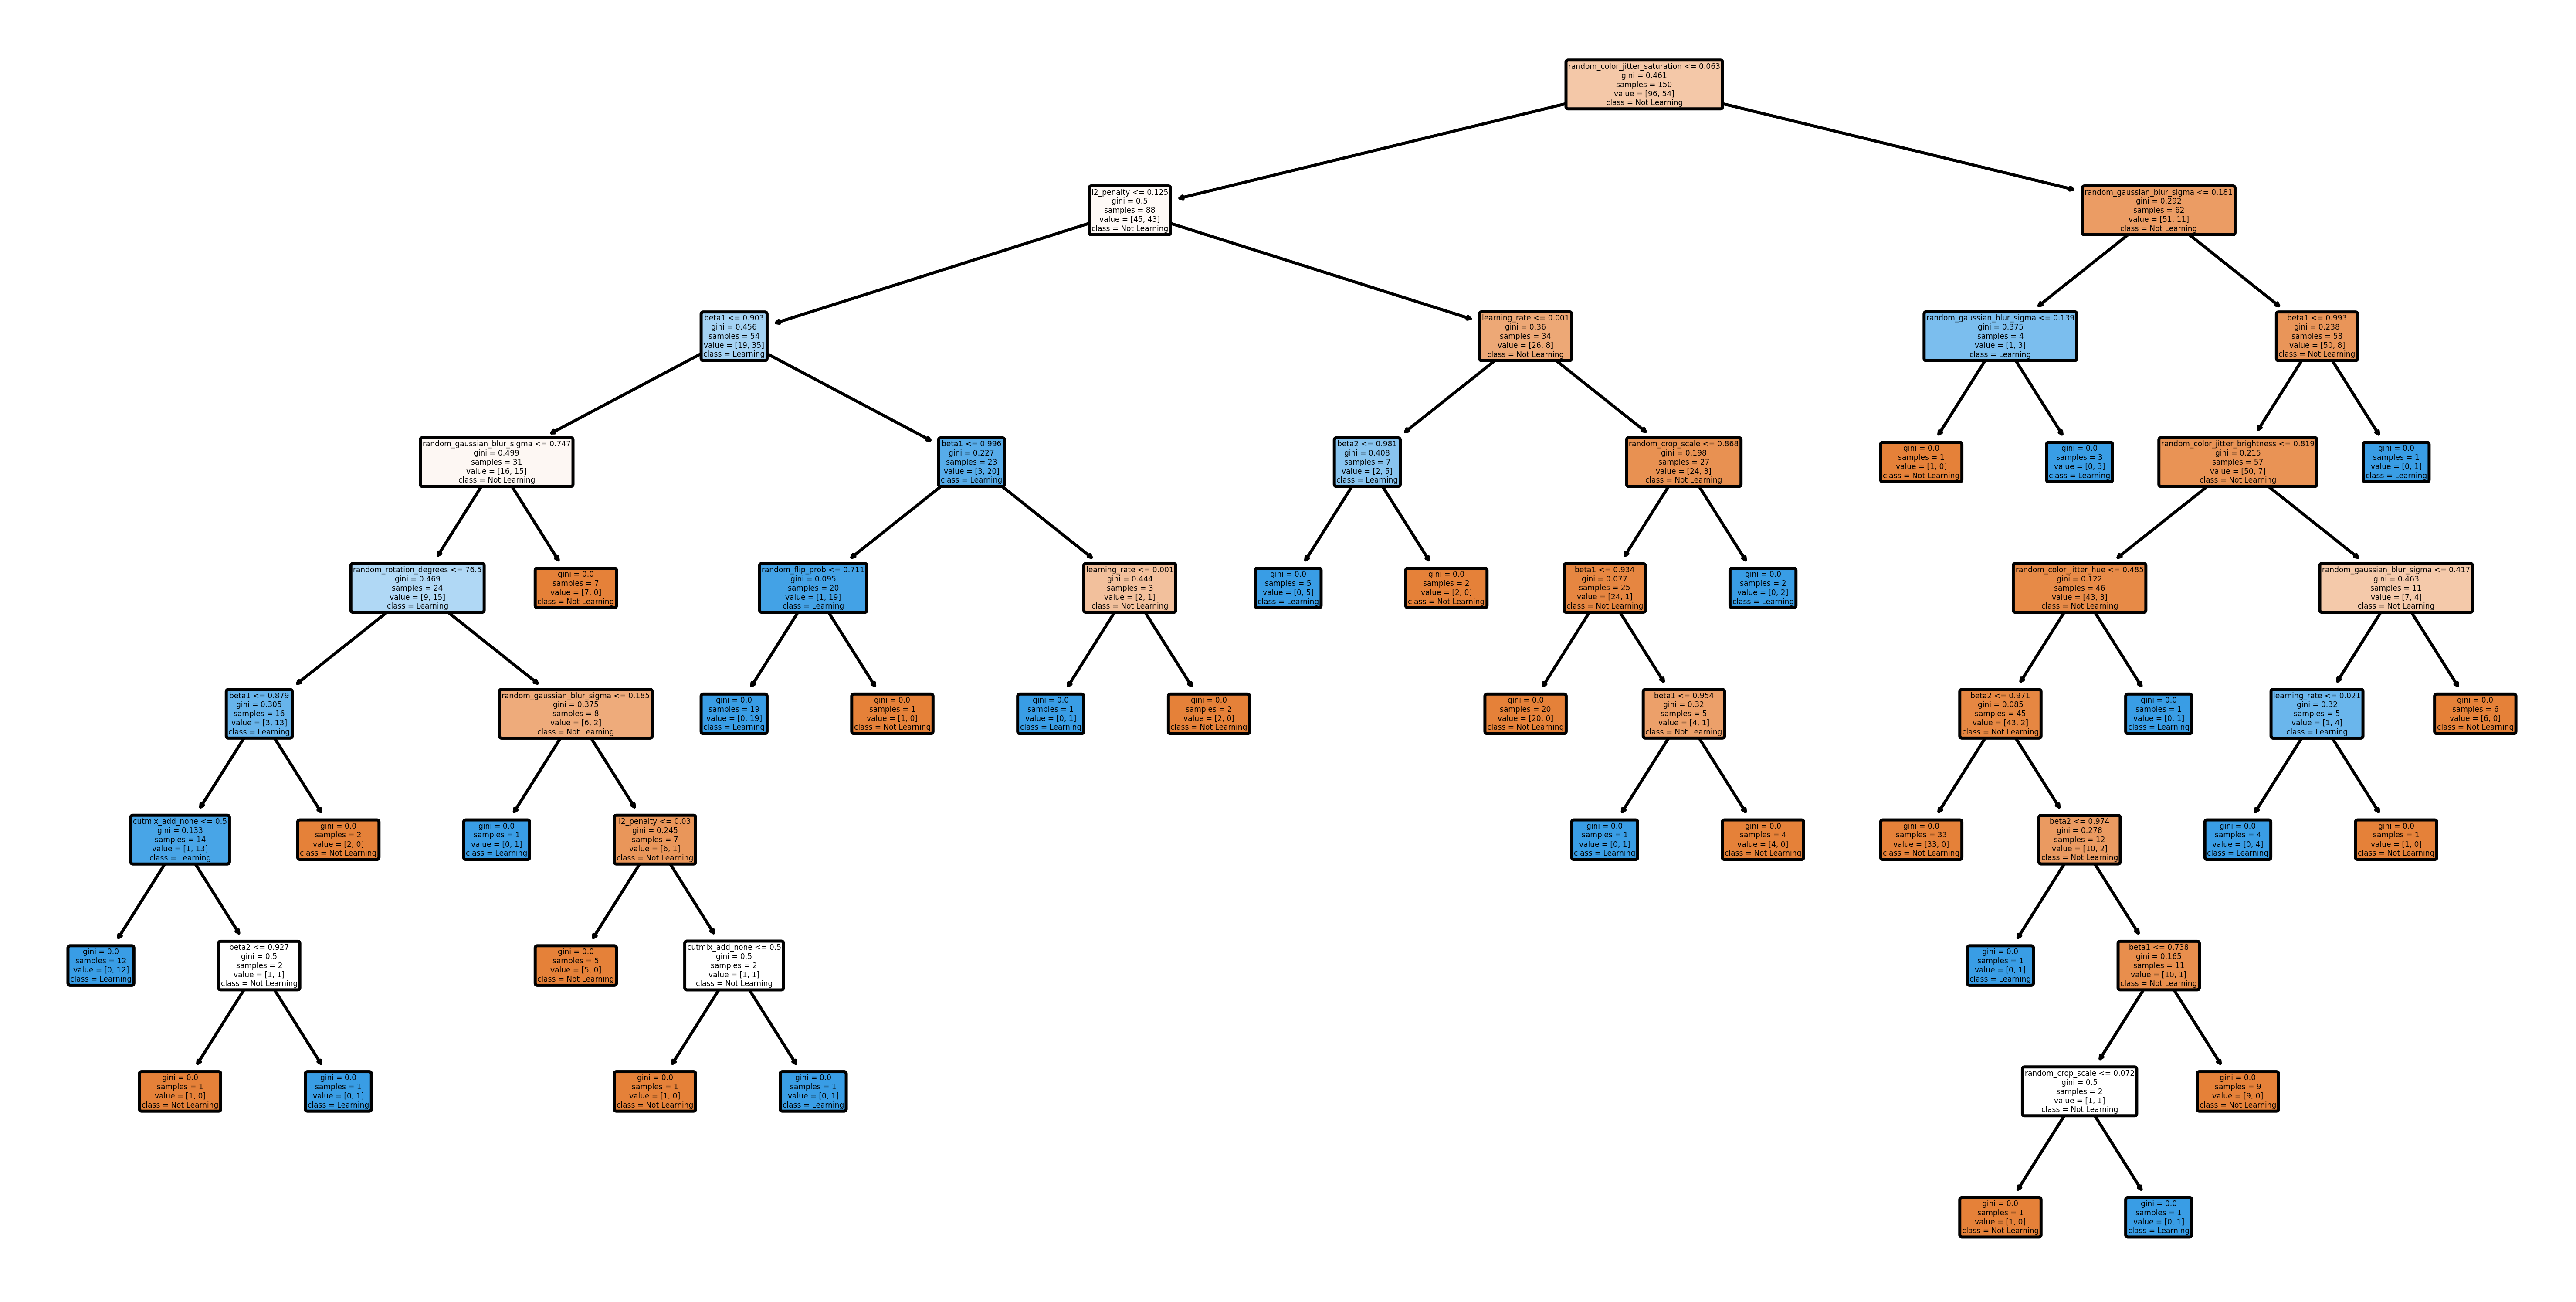

In [149]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_enc, y)

plt.figure(figsize=(15, 7.5), dpi=500)
plot_tree(dt, filled=True, rounded=True, class_names=["Not Learning", "Learning"], feature_names=list(X_enc.columns))

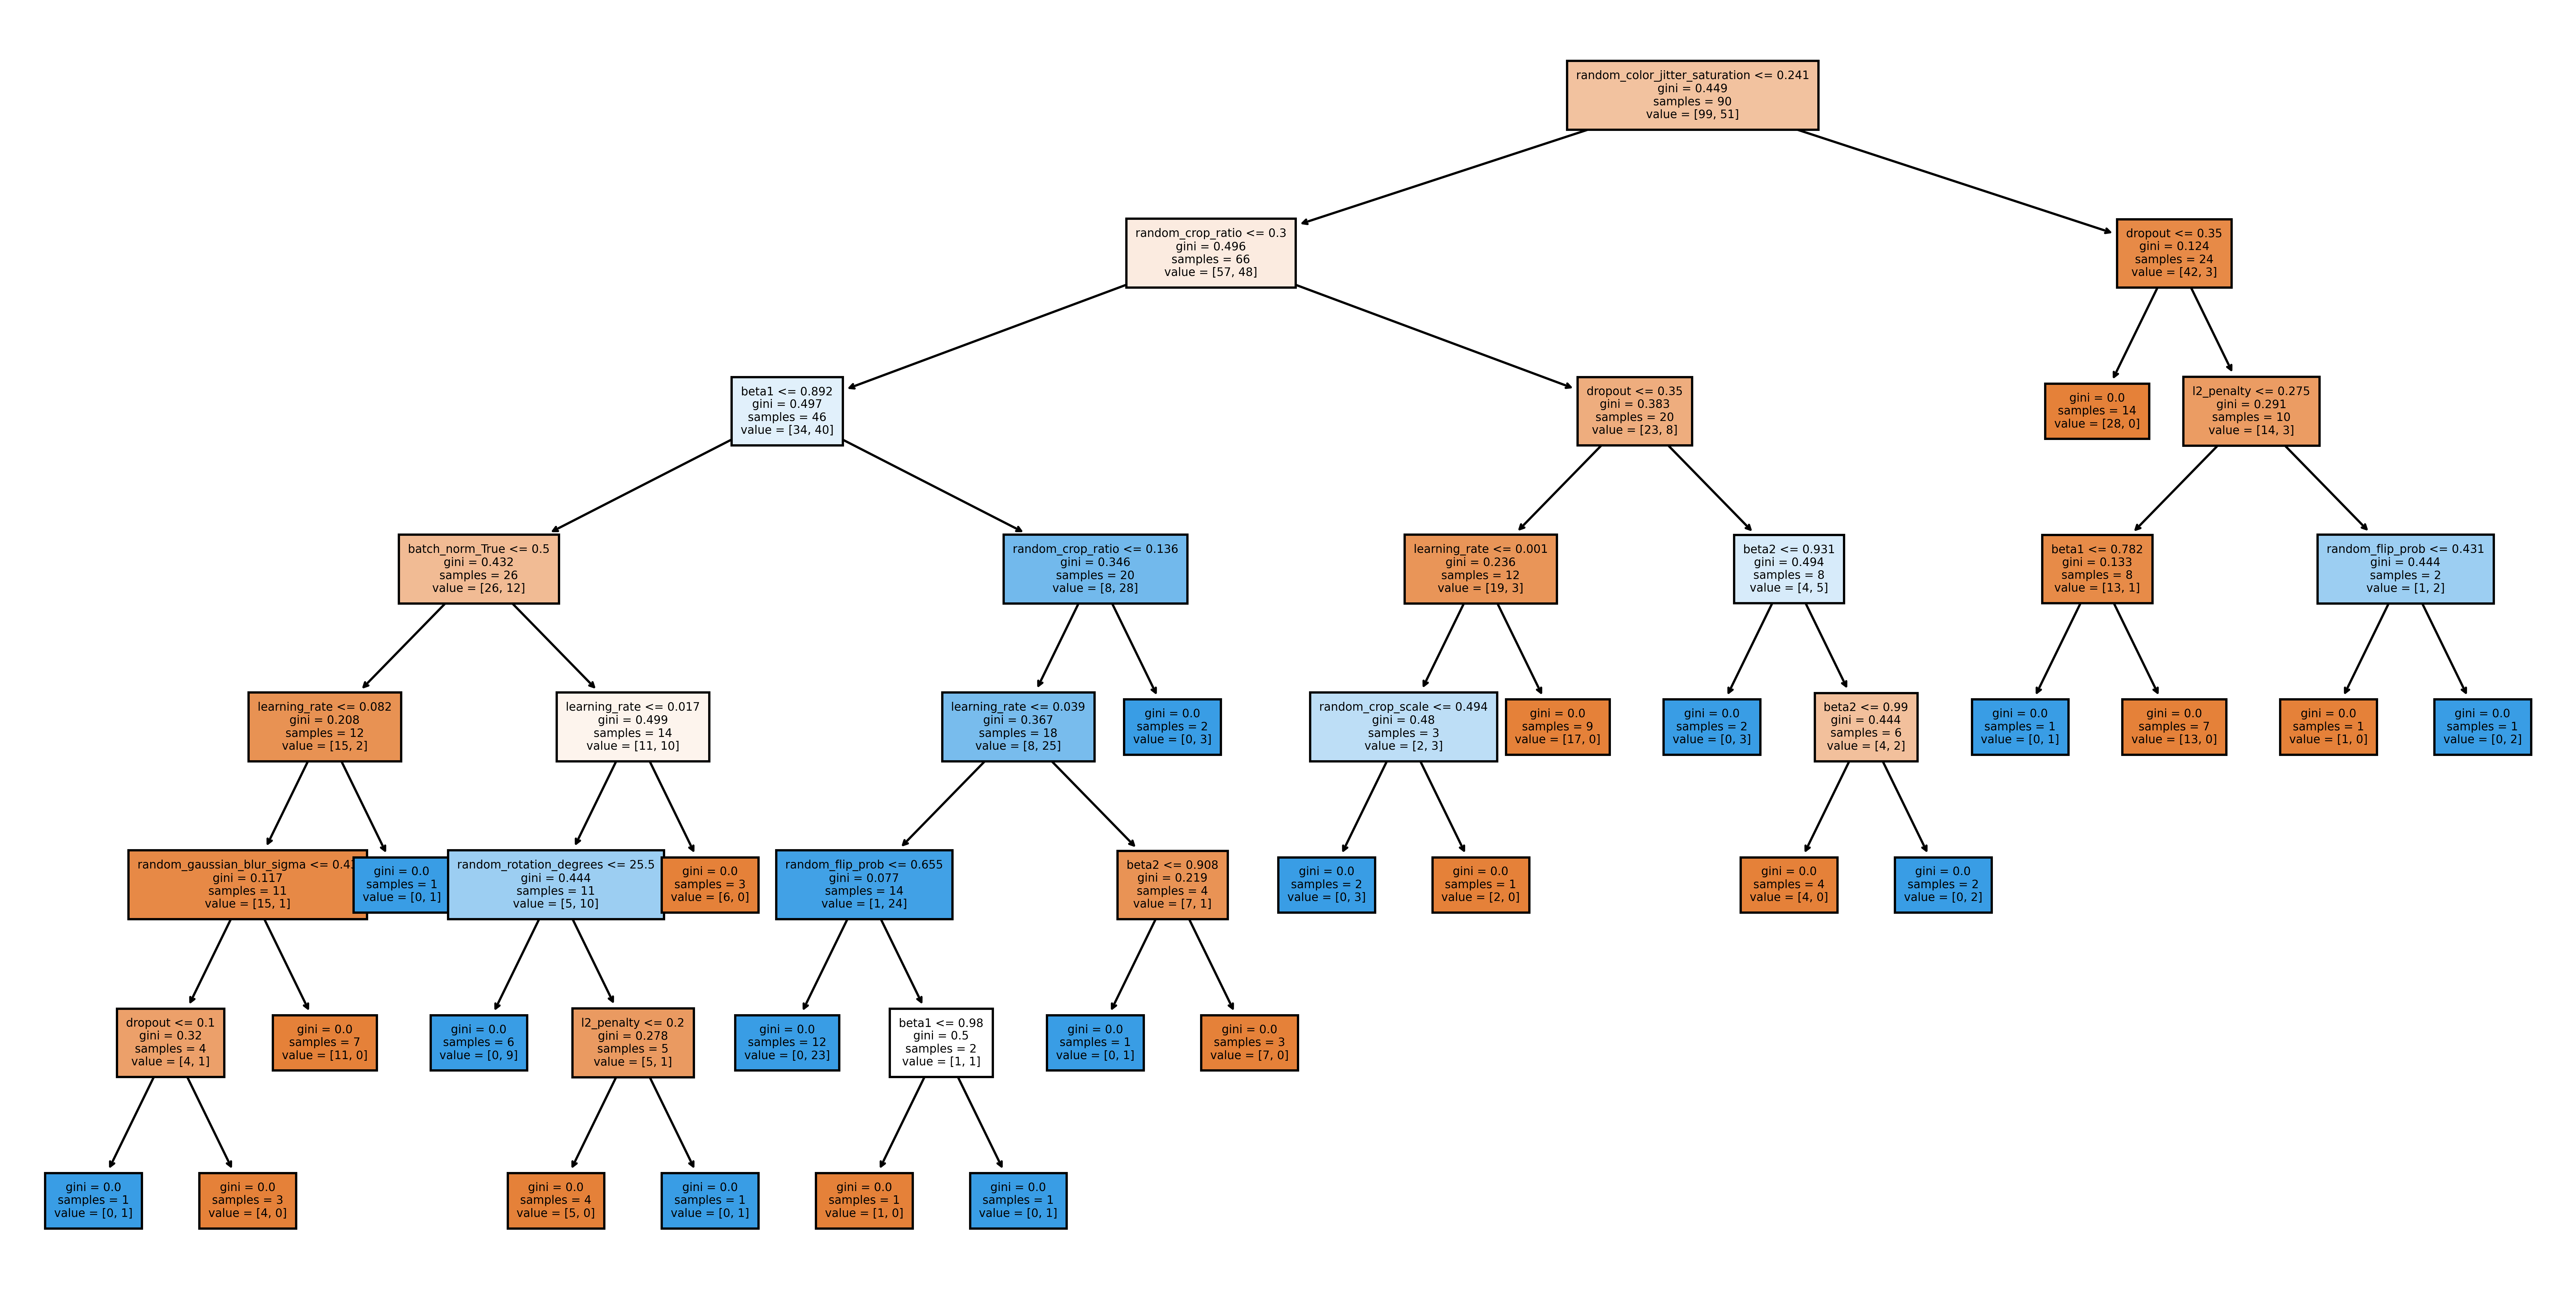

In [150]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf = RandomForestClassifier()

# Fit the model on the encoded features and target variable
rf.fit(X_enc, y)

# Plot the first tree in the random forest
plt.figure(figsize=(20, 10), dpi=500)
plot_tree(rf.estimators_[0], filled=True, fontsize=5, feature_names=list(X_enc.columns))
plt.show()